<a href="https://colab.research.google.com/github/vasukiup/ProcessSequencePrediction/blob/master/abaloneParallelPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

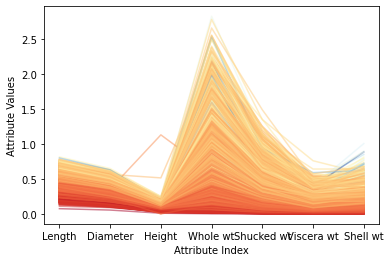

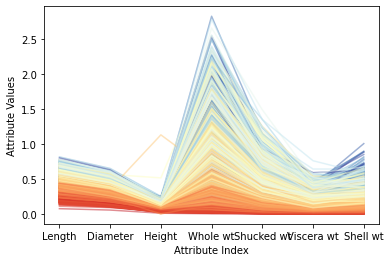

In [6]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from math import exp

target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url, header=None, prefix="V")

abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole wt', 'Shucked wt', 'Viscera wt', 'Shell wt', 'Rings']

# get summary to use for scaling

summary = abalone.describe()
minRings = summary.iloc[3,7]
maxRings = summary.iloc[7,7]
nrows = len(abalone.index)

for i in range(nrows):
  #plot rows of data as if they were series data
  dataRow = abalone.iloc[i, 1:8]
  labelColor = (abalone.iloc[i,8] - minRings) /(maxRings-minRings)
  dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

#renormalize using mean and standard deviation, then compress
#with logit function

meanRings =  summary.iloc[1,7]
sdRings = summary.iloc[2, 7]

for i in range(nrows):
  #plot rows of data as i they were series data
  dataRow = abalone.iloc[i, 1:8]
  normTarget = (abalone.iloc[i, 8] - meanRings) / sdRings
  labelColor = 1.0/(1.0 + exp(-normTarget))
  dataRow.plot(color=plot.cm.RdYlBu(labelColor, alpha=0.5))

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()